# Flight overview

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
from pansat.products.satellite.modis import (modis_terra_1km,
                                             modis_terra_geo,
                                             modis_aqua_1km,
                                             modis_aqua_geo)

## Modis data
### B984

In [4]:
start_time = datetime(2016, 10, 14, 11, 0, 0)
end_time = datetime(2016, 10, 14, 11, 0, 0)
modis_files_b984 = modis_terra_1km.download(start_time, end_time)
modis_files_b984 += modis_terra_geo.download(start_time, end_time)

EOFError: 

### C159

In [ ]:
start_time = datetime(2019, 3, 19, 11, 59, 0)
end_time = datetime(2019, 3, 19, 12, 5, 0)
modis_files_c159 = modis_terra_1km.download(start_time, end_time)
modis_files_c159 += modis_terra_geo.download(start_time, end_time)

### C161

In [ ]:
start_time = datetime(2019, 3, 21, 11, 49, 0)
end_time = datetime(2019, 3, 21, 11, 55, 0)
modis_files_c161 = modis_terra_1km.download(start_time, end_time)
modis_files_c161 += modis_terra_geo.download(start_time, end_time)

In [ ]:
from satpy.scene import Scene
import satpy.writers
from pyresample.geometry import AreaDefinition

# Define map projection
area_id = 'UK'
description = 'Projection centered on the UK.'
proj_id = 'UK'
projection = {'proj': 'laea', 'lat_0': 58, 'lon_0': -5, 'a': 6371228.0, 'units': 'm'}
width = 425
height = 425
area_extent = (-8e5, -6.67e5, 8e5, 6.67e5)
area_def_reg = AreaDefinition(area_id, description, proj_id, projection,
                          width, height, area_extent)

area_id = 'UK'
description = 'Projection centered on the UK.'
proj_id = 'UK'
projection = {'proj': 'laea', 'lat_0': 58, 'lon_0': -5, 'a': 6371228.0, 'units': 'm'}
width = 425
height = 425
area_extent = (-15e5, -12e5, 15e5, 12e5)
area_def_syn = AreaDefinition(area_id, description, proj_id, projection,
                          width, height, area_extent)


def to_image(modis_files, area_def):
    scene = Scene(modis_files, reader="modis_l1b")
    composite_name = 'true_color'
    scene.load([composite_name])
    scene_r = scene.resample(area_def)
    img = satpy.writers.to_image(scene_r["true_color"])
    img.stretch("linear")
    img.gamma(1.7)
    return img

In [ ]:
from joint_flight.data.b984 import RADAR
lats = RADAR["latitude"]
lat_min = lats.min() - 0.2
lat_max = lats.max() + 0.2
lat_0 = 0.5 * (lat_min + lat_max).data
lons = RADAR["longitude"]
lon_min = lons.min() - 0.2
lon_max = lons.max() + 0.2
lon_0 = 0.5 * (lon_min + lon_max).data

area_id = 'UK'
description = 'Projection centered on the UK.'
proj_id = 'UK'
projection = {'proj': 'laea', 'lat_0': f"{lat_0}", 'lon_0': f"{lon_0}", 'a': 6371228.0, 'units': 'm'}
width = 425
height = 425
area_extent = (-4e5, -3e5, 4e5, 3e5)
area_def_b984 = AreaDefinition(area_id, description, proj_id, projection,
                               width, height, area_extent)

In [ ]:
from joint_flight.data.b984 import PSD
lats = PSD["latitude"]
lat_min = lats.min() - 0.2
lat_max = lats.max() + 0.2
lat_0 = 0.5 * (lat_min + lat_max).data
lons = PSD["longitude"]
lon_min = lons.min() - 0.2
lon_max = lons.max() + 0.2
lon_0 = 0.5 * (lon_min + lon_max).data

area_id = 'UK'
description = 'Projection centered on the UK.'
proj_id = 'UK'
projection = {'proj': 'laea', 'lat_0': f"{lat_0}", 'lon_0': f"{lon_0}", 'a': 6371228.0, 'units': 'm'}
width = 425
height = 425
area_extent = (-1e5, -1.0e5, 1e5, 1.0e5)
area_def_b984_det = AreaDefinition(area_id, description, proj_id, projection,
                               width, height, area_extent)

In [ ]:
from joint_flight.data.c159 import RADAR
lats = RADAR["latitude"]
lat_min = lats.min() - 0.2
lat_max = lats.max() + 0.2
lat_0 = 0.5 * (lat_min + lat_max).data
lons = RADAR["longitude"]
lon_min = lons.min() - 0.2
lon_max = lons.max() + 0.2
lon_0 = 0.5 * (lon_min + lon_max).data

area_id = 'UK'
description = 'Projection centered on the UK.'
proj_id = 'UK'
projection = {'proj': 'laea', 'lat_0': f"{lat_0}", 'lon_0': f"{lon_0}", 'a': 6371228.0, 'units': 'm'}
width = 425
height = 425
area_extent = (-4e5, -3e5, 4e5, 3e5)
area_def_c159 = AreaDefinition(area_id, description, proj_id, projection,
                               width, height, area_extent)

In [ ]:
from joint_flight.data.c159 import PSD
lats = PSD["latitude"]
lat_min = lats.min() - 0.2
lat_max = lats.max() + 0.2
lat_0 = 0.5 * (lat_min + lat_max).data
lons = PSD["longitude"]
lon_min = lons.min() - 0.2
lon_max = lons.max() + 0.2
lon_0 = 0.5 * (lon_min + lon_max).data

area_id = 'UK'
description = 'Projection centered on the UK.'
proj_id = 'UK'
projection = {'proj': 'laea', 'lat_0': f"{lat_0}", 'lon_0': f"{lon_0}", 'a': 6371228.0, 'units': 'm'}
width = 425
height = 425
area_extent = (-1e5, -1.0e5, 1e5, 1.0e5)
area_def_c159_det = AreaDefinition(area_id, description, proj_id, projection,
                               width, height, area_extent)

In [ ]:
from joint_flight.data.c161 import RADAR
lats = RADAR["latitude"]
lat_min = lats.min() - 0.2
lat_max = lats.max() + 0.2
lat_0 = 0.5 * (lat_min + lat_max).data
lons = RADAR["longitude"]
lon_min = lons.min() - 0.2
lon_max = lons.max() + 0.2
lon_0 = 0.5 * (lon_min + lon_max).data

area_id = 'UK'
description = 'Projection centered on the UK.'
proj_id = 'UK'
projection = {'proj': 'laea', 'lat_0': f"{lat_0}", 'lon_0': f"{lon_0}", 'a': 6371228.0, 'units': 'm'}
width = 425
height = 425
area_extent = (-4e5, -3e5, 4e5, 3e5)
area_def_c161 = AreaDefinition(area_id, description, proj_id, projection,
                               width, height, area_extent)

In [ ]:
modis_files_b984 = list(map(str, modis_files_b984))
modis_b984 = to_image(modis_files_b984, area_def_b984)
modis_b984_det = to_image(modis_files_b984, area_def_b984_det)
modis_files_c159 = list(map(str, modis_files_c159))
modis_c159 = to_image(modis_files_c159, area_def_c159)
modis_c159_det = to_image(modis_files_c159, area_def_c159_det)
modis_files_c161 = list(map(str, modis_files_c161))
modis_c161 = to_image(modis_files_c161, area_def_c161)

In [ ]:
img_b984 = modis_b984.pil_image()
img_b984_det = modis_b984_det.pil_image()
img_c159 = modis_c159.pil_image()
img_c159_det = modis_c159_det.pil_image()
img_c161 = modis_c161.pil_image()

In [ ]:
import xarray as xr
from joint_flight.data.b984 import ISMAR as ismar_b984
from joint_flight.data.b984 import START_TIME as start_b984
from joint_flight.data.b984 import END_TIME as end_b984
from joint_flight.data.b984 import ERA5_PRESSURE_FILE
era5_b984 = xr.load_dataset(ERA5_PRESSURE_FILE).loc[{"level": 800}]

from joint_flight.data.c159 import ISMAR as ismar_c159
from joint_flight.data.c159 import START_TIME as start_c159
from joint_flight.data.c159 import END_TIME as end_c159
from joint_flight.data.c159 import ERA5_PRESSURE_FILE
era5_c159 = xr.load_dataset(ERA5_PRESSURE_FILE).loc[{"level": 800}]

from joint_flight.data.c161 import ISMAR as ismar_c161
from joint_flight.data.c161 import START_TIME as start_c161
from joint_flight.data.c161 import END_TIME as end_c161
from joint_flight.data.c161 import ERA5_PRESSURE_FILE
era5_c161 = xr.load_dataset(ERA5_PRESSURE_FILE).loc[{"level": 800}]

In [ ]:
from pansat.products.reanalysis.era5 import ERA5Hourly
era5_pressure = ERA5Hourly("pressure", ["t", "z", "u", "v"], domain=[40, 70, -35, 25])
files_b984 = era5_pressure.download(start_b984.item(), start_b984.item())
era5_b984 = xr.open_dataset(files_b984[0]).loc[{"level": 800}]

In [ ]:
files_c159 = era5_pressure.download(start_c159.item(), start_c159.item())
era5_c159 = xr.open_dataset(files_c159[0]).loc[{"level": 800}]

In [ ]:
era5_c159 = xr.open_dataset(files_c159[0]).loc[{"level": 800}]

In [ ]:
files_c161 = era5_pressure.download(start_c161.item(), start_c161.item())
era5_c161 = xr.open_dataset(files_c161[0]).loc[{"level": 800}]

In [ ]:
era5_c161 = xr.open_dataset(files_c161[0]).loc[{"level": 800}]

In [ ]:
from joint_flight import PATH
from h5py import File
from joint_flight.data.c159 import CLOUDSAT_FILENAME
from joint_flight.cloud_sat import load_radar_data
i_start = 20_000
i_end = 30_000
r_c159 = load_radar_data(PATH / "data" / CLOUDSAT_FILENAME, i_start, i_end)
lats_cs_c159 = r_c159["latitude"]
lons_cs_c159 = r_c159["longitude"]

In [ ]:
from joint_flight import PATH
from h5py import File
from joint_flight.data.c161 import CLOUDSAT_FILENAME
from joint_flight.cloud_sat import load_radar_data
i_start = 22_000
i_end = 26_000
r_c161 = load_radar_data(PATH / "data" / CLOUDSAT_FILENAME, i_start, i_end)
lats_cs_c161 = r_c161["latitude"]
lons_cs_c161 = r_c161["longitude"]

In [ ]:
str(radar_c159["time"][0])

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import cartopy.feature as cfeature
from joint_flight.notebook import *
from matplotlib.colors import Normalize

from joint_flight.data.b984 import ISMAR as ismar_b984
from joint_flight.data.c159 import ISMAR as ismar_c159
from joint_flight.data.c161 import ISMAR as ismar_c161
from joint_flight.data.b984 import RADAR as radar_b984
from joint_flight.data.c159 import RADAR as radar_c159
from joint_flight.data.c161 import RADAR as radar_c161
import pandas as pd 
wind_norm = Normalize(0, 50)
crs_reg = area_def_reg.to_cartopy_crs()
crs_syn = area_def_syn.to_cartopy_crs()
pc = ccrs.PlateCarree()

fig = plt.figure(figsize=(11, 6))
gs = GridSpec(4, 5,
              width_ratios=[0.1, 1.0, 1.0, 1.0, 0.3],
              height_ratios=[0.1, 1.0, 1.0, 0.1]
             )
color = "k"
text_color = "orangered"
color_cs = "blue"


#
# B984
#

area_def_reg = area_def_b984
crs_reg = area_def_reg.to_cartopy_crs()
ax = plt.subplot(gs[1, 1], projection=crs_reg)
ext = area_def_reg.area_extent
ext = [ext[0], ext[2], ext[1], ext[3]]
ax.imshow(img_b984, origin="upper", extent=ext)
ax.set_title("B984 (2016-10-14)", pad=15)

lats = ismar_b984["latitude"]
lons = ismar_b984["longitude"]
ax.plot(lons, lats, c=text_color, transform=pc, zorder=11, ls="--")
ax.scatter(lons[[0, -1]],
           lats[[0, -1]],
           c=text_color, transform=pc, zorder=11)

start = pd.to_datetime(ismar_b984["time"][0].data) 
ax.text(lons[0] + 1.5, lats[0] - 0.5, 
        start.strftime("%H:%M:%S"),
        transform=pc,
        c=text_color, size=14, weight="bold", zorder=11)
end = pd.to_datetime(ismar_b984["time"][-1].data) 
ax.text(lons[-1] + 1.5, lats[-1] - 0.5,
        end.strftime("%H:%M:%S"),
        transform=pc, c=text_color, size=14, weight="bold", zorder=11)
ax.coastlines(resolution='50m', color="k", linewidth=1)
ax.set_global()


ax = plt.subplot(gs[2, 1], projection=crs_syn)
lats = era5_b984["latitude"].data
lons = era5_b984["longitude"].data
t = era5_b984["t"].data[0]
z = era5_b984["z"].data[0]
u = era5_b984["u"].data[0]
v = era5_b984["v"].data[0]
m = ax.pcolormesh(lons, lats, t, transform=pc, cmap="coolwarm")
ax.coastlines(resolution='110m', color=color, linewidth=1, zorder=30)
cs = ax.contour(lons, lats, z, transform=pc, linewidths=1, colors="white")
plt.clabel(cs, fontsize=6, fmt=r"%1.0f kJ kg$^{-1}$")
q1 = ax.quiver(lons[::10],
               lats[::10],
               u[::10, ::10],
               v[::10, ::10],
               transform=pc, cmap="bone_r", norm=wind_norm)
lats = ismar_b984["latitude"]
lons = ismar_b984["longitude"]
ax.plot(lons, lats, c=text_color, transform=pc, zorder=11, ls="--")
ax.scatter(lons[[0, -1]],
           lats[[0, -1]],
           c=text_color, transform=pc, zorder=11)
ax.set_global()

ax = plt.subplot(gs[3, 1])
plt.colorbar(m, cax=ax, orientation="horizontal", label="Temperature [K]")

ax = plt.subplot(gs[2, -1])
ax.set_axis_off()

#
# C159
#

area_def_reg = area_def_c159
crs_reg = area_def_reg.to_cartopy_crs()
ax = plt.subplot(gs[1, 2], projection=crs_reg)
ext = area_def_reg.area_extent
ext = [ext[0], ext[2], ext[1], ext[3]]
ax.imshow(img_c159, origin="upper", extent=ext)
ax.coastlines(resolution='50m', color=color, linewidth=1)
ax.set_title("C159 (2019-03-19)", pad=15)

lats = ismar_c159["latitude"]
lons = ismar_c159["longitude"]
ax.plot(lons_cs_c159, lats_cs_c159, transform=pc, c=color_cs)
ax.plot(lons, lats, c=text_color, transform=pc, zorder=11, ls="--")
ax.scatter(lons[[0, -1]],
           lats[[0, -1]],
           c=text_color, transform=pc, zorder=11)
start = pd.to_datetime(ismar_c159["time"][0].data) 
ax.text(lons[0] + 1.5, lats[0] - 0.5, 
        start.strftime("%H:%M:%S"),
        transform=pc,
        c=text_color, size=14, weight="bold", zorder=11)
end = pd.to_datetime(ismar_c159["time"][-1].data) 
ax.text(lons[-1] + 1.5, lats[-1] - 0.5,
        end.strftime("%H:%M:%S"),
        transform=pc, c=text_color, size=14, weight="bold", zorder=11)
# CloudSat time
lats_r = radar_c159["latitude"]
lons_r = radar_c159["longitude"]
end = pd.to_datetime(radar_c159["time"][-1].data) 
ax.text(lons_r[-1] - 5.5, lats_r[-1] - 0.5,
        end.strftime("%H:%M:%S"),
        transform=pc, c=color_cs, size=14, weight="bold", zorder=11)
start = pd.to_datetime(radar_c159["time"][0].data) 
ax.text(lons_r[0] - 5.5, lats_r[0] - 0.5,
        start.strftime("%H:%M:%S"),
        transform=pc, c=color_cs, size=14, weight="bold", zorder=11)

lats = ismar_c159["latitude"]
lons = ismar_c159["longitude"]

ax.set_global()

ax = plt.subplot(gs[2, 2], projection=crs_syn)
lats = era5_c159["latitude"].data
lons = era5_c159["longitude"].data
t = era5_c159["t"].data[0]
z = era5_c159["z"].data[0]
u = era5_c159["u"].data[0]
v = era5_c159["v"].data[0]
m = ax.pcolormesh(lons, lats, t, transform=pc, cmap="coolwarm")
ax.coastlines(resolution='110m', color=color, linewidth=1, zorder=30)
cs = ax.contour(lons, lats, z, transform=pc, linewidths=1, colors="white")
plt.clabel(cs, fontsize=6, fmt=r"%1.0f kJ kg$^{-1}$")
ax.quiver(lons[::10],
          lats[::10],
          u[::10, ::10],
          v[::10, ::10],
          transform=pc, cmap="bone_r", norm=wind_norm)
lats = ismar_c159["latitude"]
lons = ismar_c159["longitude"]

ax.plot(lons, lats, c=text_color, transform=pc, zorder=11, ls="--")
ax.scatter(lons[[0, -1]],
           lats[[0, -1]],
           c=text_color, transform=pc, zorder=11)
ax.set_global()

ax = plt.subplot(gs[3, 2])
plt.colorbar(m, cax=ax, orientation="horizontal", label="Temperature [K]")


#
# C161
#

area_def_reg = area_def_c161
crs_reg = area_def_reg.to_cartopy_crs()
ax = plt.subplot(gs[2, 3], projection=crs_syn)
lats = era5_c161["latitude"].data
lons = era5_c161["longitude"].data
t = era5_c161["t"].data[0]
z = era5_c161["z"].data[0]
u = era5_c161["u"].data[0]
v = era5_c161["v"].data[0]
m = ax.pcolormesh(lons, lats, t, transform=pc, cmap="coolwarm")
ax.coastlines(resolution='110m', linewidth=1)
cs = ax.contour(lons, lats, z / 1e3, transform=pc, linewidths=1, colors="white")

plt.clabel(cs, fontsize=6, fmt=r"%1.0f kJ kg$^{-1}$")
ax.set_global()
q = ax.quiver(lons[::10],
              lats[::10],
              u[::10, ::10],
              v[::10, ::10],
              transform=pc, cmap="bone_r", norm=wind_norm)
ax.quiverkey(q, 1.5, 0.5, 50, "Wind ($\SI{50}{\meter \per \second}$)", coordinates="axes")
lats = ismar_c161["latitude"]
lons = ismar_c161["longitude"]
ax.plot(lons, lats, c=text_color, transform=pc, zorder=11, ls="--")
ax.scatter(lons[[0, -1]],
           lats[[0, -1]],
           c=text_color, transform=pc, zorder=11)

ax = plt.subplot(gs[3, 3])
plt.colorbar(m, cax=ax, orientation="horizontal", label="Temperature [K]")


ax = plt.subplot(gs[1, 3], projection=crs_reg)
ax.imshow(img_c161, origin="upper", extent=crs_reg.bounds)
ax.coastlines(resolution='50m', color=color, linewidth=1)
ax.set_title("C161 (2019-03-21)", pad=15)

lats = ismar_c161["latitude"]
lons = ismar_c161["longitude"]
handles = []
handles += ax.plot(lons_cs_c161, lats_cs_c161, transform=pc, c=color_cs)
handles += ax.plot(lons, lats, c=text_color, transform=pc, zorder=11, ls="--", label="FAAM flight path")

ax.scatter(lons[[0, -1]],
           lats[[0, -1]],
           c=text_color, transform=pc, zorder=11)
start = pd.to_datetime(ismar_c161["time"][0].data) 
ax.text(lons[0] + 1.5, lats[0] - 0.5, 
        start.strftime("%H:%M:%S"), transform=pc,
        c=text_color, size=14, weight="bold", zorder=11)
end = pd.to_datetime(ismar_c161["time"][-1].data) 
ax.text(lons[-1] + 1.5, lats[-1] - 0.5,
        end.strftime("%H:%M:%S"),
        transform=pc, c=text_color, size=14, weight="bold", zorder=11)

lats_r = radar_c161["latitude"]
lons_r = radar_c161["longitude"]
end = pd.to_datetime(radar_c161["time"][-1].data) 
ax.text(lons_r[-1] - 5.5, lats_r[-1] - 0.5,
        end.strftime("%H:%M:%S"),
        transform=pc, c=color_cs, size=14, weight="bold", zorder=11)
start = pd.to_datetime(radar_c161["time"][0].data) 
ax.text(lons_r[0] - 5.5, lats_r[0] - 0.5,
        start.strftime("%H:%M:%S"),
        transform=pc, c=color_cs, size=14, weight="bold", zorder=11)

ax.set_global()

labels = ["CloudSat swath", "Flight path"]
ax = plt.subplot(gs[1, -1], projection=pc)
ax.set_axis_off()
ax.legend(handles=handles, labels=labels, loc="center left")

#
# Row titles
#

ax = plt.subplot(gs[1, 0])
ax.set_axis_off()
ax.text(0.0, 0.5,
        "MODIS true color",
        transform=ax.transAxes,
        ha='center',
        va='center',
        weight="bold",
        rotation=90)

ax = plt.subplot(gs[2, 0])
ax.set_axis_off()
ax.text(0.5, 0.5,
        r"ERA5 ($\SI{800}{\milli \bar}$)",
        transform=ax.transAxes,
        ha='center',
        va='center',
        weight="bold",
        rotation=90)

fig.savefig(
    "../plots/flight_overview.png",
    bbox_inches="tight",
    dpi=300
)
plt.show()

In [ ]:
from joint_flight.data.b984 import START_TIME_IN_SITU as b984_st_in_situ
from joint_flight.data.b984 import END_TIME_IN_SITU as b984_et_in_situ
from joint_flight.data.b984 import PSD as b984_psd
from joint_flight.data.c159 import START_TIME_IN_SITU as c159_st_in_situ
from joint_flight.data.c159 import END_TIME_IN_SITU as c159_et_in_situ
from joint_flight.data.c159 import PSD as c159_psd

crs_reg = area_def_reg.to_cartopy_crs()
crs_syn = area_def_syn.to_cartopy_crs()
pc = ccrs.PlateCarree()

fig = plt.figure(figsize=(12, 6))
gs = GridSpec(1, 3, width_ratios=[1.0, 1.0, 0.5])
color = "k"
text_color = "orangered"

#
# B984
#

area_def_reg = area_def_b984_det
crs_reg = area_def_reg.to_cartopy_crs()
ax = plt.subplot(gs[0, 0], projection=crs_reg)
ext = area_def_reg.area_extent
ext = [ext[0], ext[2], ext[1], ext[3]]
ax.imshow(img_b984_det, origin="upper", extent=ext)
ax.set_title("B984 (2016-10-14)", pad=15)

lats = ismar_b984["latitude"]
lons = ismar_b984["longitude"]
ax.plot(lons, lats, c=text_color, transform=pc, zorder=11, ls="--", lw=2)
ax.scatter(lons[[0, -1]],
           lats[[0, -1]],
           c=text_color, transform=pc, zorder=11)
ax.coastlines(resolution='50m', color="k", linewidth=1)
ax.set_global()

lats = b984_psd["latitude"]
lons = b984_psd["longitude"]
ax.plot(lons, lats, c="darkviolet", transform=pc, zorder=11, ls="-", lw=2)
ax.text(lons[0] + 0.2, lats[0] + 0.05, 
        b984_st_in_situ.item().strftime("%H:%M:%S"),
        transform=pc,
        c="darkviolet", size=14, weight="bold", zorder=11)
ax.text(lons[-1] + 0.2, lats[-1] - 0.05,
        b984_et_in_situ.item().strftime("%H:%M:%S"),
        transform=pc, c="darkviolet", size=14, weight="bold", zorder=11)


#
# C159
#

area_def_reg = area_def_c159_det
crs_reg = area_def_reg.to_cartopy_crs()
ax = plt.subplot(gs[0, 1], projection=crs_reg)
ext = area_def_reg.area_extent
ext = [ext[0], ext[2], ext[1], ext[3]]
ax.imshow(img_c159_det, origin="upper", extent=ext)
ax.coastlines(resolution='50m', color=color, linewidth=1)
ax.set_title("C159 (2019-03-19)", pad=15)

handles = []
lats = ismar_c159["latitude"]
lons = ismar_c159["longitude"]
handles += ax.plot(lons_cs_c159, lats_cs_c159, transform=pc, c="steelblue", lw=2)
handles += ax.plot(lons, lats, c=text_color, transform=pc, zorder=11, ls="--", lw=2)
ax.scatter(lons[[0, -1]],
           lats[[0, -1]],
           c=text_color, transform=pc, zorder=11)
ax.set_global()

lats = c159_psd["latitude"]
lons = c159_psd["longitude"]
handles += ax.plot(lons, lats, c="darkviolet", transform=pc, zorder=11, ls="-", lw=2)
ax.text(lons[0] + 0.15, lats[0], 
        c159_st_in_situ.item().strftime("%H:%M:%S"),
        transform=pc,
        c="darkviolet", size=14, weight="bold", zorder=11)
ax.text(lons[-1] + 0.15, lats[-1],
        c159_et_in_situ.item().strftime("%H:%M:%S"),
        transform=pc, c="darkviolet", size=14, weight="bold", zorder=11)



#
# Legend
#

labels = ["CloudSat swath", "Flight path (high-level)", "Fligh path (in-situ)"]
ax = plt.subplot(gs[0, -1], projection=pc)
ax.set_axis_off()
ax.legend(handles=handles, labels=labels, loc="center left")


fig.savefig(
    "../plots/flight_overview_detail.png",
    bbox_inches="tight",
    dpi=300
)
plt.show()

## Radar observations

In [ ]:
%load_ext autoreload
%autoreload 2
from joint_flight.data.b984 import RADAR as radar_b984
from joint_flight.data.c159 import RADAR as radar_c159
from joint_flight.data.c161 import RADAR as radar_c161
from joint_flight.data.b984 import ATMOSPHERE as atm_b984
from joint_flight.data.c159 import ATMOSPHERE as atm_c159
from joint_flight.data.c161 import ATMOSPHERE as atm_c161

In [ ]:
from matplotlib.colors import Normalize
from matplotlib.gridspec import GridSpec
from joint_flight.notebook import *

norm = Normalize(-30, 20)
fig = plt.figure(figsize=(10, 8))
gs = GridSpec(6, 2, width_ratios=[1.0, 0.03])

ax = plt.subplot(gs[:2, 0])
x = radar_b984.x / 1e3
y = radar_b984.y / 1e3
z = radar_b984.dbz
m = ax.pcolormesh(x, y, z, norm=norm)

x2 = 0.25 * (x[:-1, :-1] + x[:-1, 1:] +
             x[1:, :-1] + x[1:, 1:])
y2 = 0.25 * (y[:-1, :-1] + y[:-1, 1:] +
             y[1:, :-1] + y[1:, 1:])
t = atm_b984.temperature.data
cs = ax.contour(x2, y2, t, levels=[273.15], colors="white", linewidths=1)
plt.clabel(cs, fontsize=10, fmt=r"%1.2f$\si{\kelvin}$",
           manual=[(75, 10)])

ax.set_ylim([0, 10])
ax.set_ylabel(r"Altitude [$\si{\kilo \meter}$]")
ax.set_title("(a) B984", loc="left", pad=15)
ax.spines["left"].set_position(('outward', 10))

ax = plt.subplot(gs[2:4, 0])
x = radar_c159.x / 1e3
y = radar_c159.y / 1e3
z = radar_c159.dbz
m = ax.pcolormesh(x, y, z, norm=norm)

x2 = 0.25 * (x[:-1, :-1] + x[:-1, 1:] +
             x[1:, :-1] + x[1:, 1:])
y2 = 0.25 * (y[:-1, :-1] + y[:-1, 1:] +
             y[1:, :-1] + y[1:, 1:])
t = atm_c159.temperature.data
cs = ax.contour(x2, y2, t, levels=[273.15], colors="white", linewidths=1)
plt.clabel(cs, fontsize=10, fmt=r"%1.2f$\si{\kelvin}$",
           manual=[(375, 10)])

ax.set_ylim([0, 10])
ax.set_ylabel(r"Altitude [$\si{\kilo \meter}$]")
ax.set_title("(b) C159", loc="left", pad=15)
ax.spines["left"].set_position(('outward', 10))

ax = plt.subplot(gs[4:6, 0])
x = radar_c161.x / 1e3
y = radar_c161.y / 1e3
z = radar_c161.dbz
m = ax.pcolormesh(x, y, z, norm=norm)

x2 = 0.25 * (x[:-1, :-1] + x[:-1, 1:] +
             x[1:, :-1] + x[1:, 1:])
y2 = 0.25 * (y[:-1, :-1] + y[:-1, 1:] +
             y[1:, :-1] + y[1:, 1:])
t = atm_c161.temperature.data
cs = ax.contour(x2,
                y2,
                t,
                levels=[273.15],
                colors="white",
                linewidths=1)
plt.clabel(cs, fontsize=10, fmt=r"%1.2f$\si{\kelvin}$",
                manual=[(420, 0.8)])

ax.set_ylim([0, 10])
ax.set_ylabel(r"Altitude [$\si{\kilo \meter}$]")
ax.set_xlabel(r"Along-track distance [$\si{\kilo \meter}$]")
ax.set_title("(c) C161", loc="left", pad=15)
ax.spines["left"].set_position(('outward', 10))

ax = plt.subplot(gs[1:5, 1])
plt.colorbar(m,
             cax=ax,
             label=r"Radar reflectivity [$\si{\deci \bel}Z$]")


plt.tight_layout()
plt.show()
fig.savefig("../plots/observations_radar.png", dpi=300)


### Marss observations

In [ ]:
from joint_flight import plot_observations_marss
from joint_flight.data.b984 import MARSS as marss_b984
from joint_flight.data.c159 import MARSS as marss_c159
from joint_flight.data.c161 import MARSS as marss_c161
from joint_flight.data.b984 import SURFACE_MASK as surface_mask_b984
from joint_flight.data.c159 import SURFACE_MASK as surface_mask_c159
from joint_flight.data.c161 import SURFACE_MASK as surface_mask_c161
fig = plt.figure(figsize=(16, 8))
gs = GridSpec(4, 5, width_ratios=[0.8, 2.0, 2.0, 2.0, 0.05])

names_axs = [plt.subplot(gs[i, 0]) for i in range(4)]
legend_axs = [plt.subplot(gs[i, -1]) for i in range(4)]
axs_b984 = [plt.subplot(gs[i, 1]) for i in range(4)]
axs_c159 = [plt.subplot(gs[i, 2], sharey=axs_b984[i]) for i in range(4)]
axs_c161 = [plt.subplot(gs[i, 3], sharey=axs_b984[i]) for i in range(4)]

plot_observations_marss(marss_b984, radar_b984, surface_mask_b984, axs_b984, legend_axs, names_axs)
plot_observations_marss(marss_c159, radar_c159, surface_mask_c159, axs_c159, legend_axs, names_axs, y_axis=False)
plot_observations_marss(marss_c161, radar_c161, surface_mask_c161, axs_c161, legend_axs, names_axs, y_axis=False)

axs_b984[0].set_title("B984")
axs_c159[0].set_title("C159")
axs_c161[0].set_title("C161")

plt.show()

fig.savefig("../plots/observations_marss.png", dpi=200, bbox_inches="tight")

In [3]:
from joint_flight import plot_observations_ismar
from joint_flight.data.b984 import ISMAR as ismar_b984
from joint_flight.data.c159 import ISMAR as ismar_c159
from joint_flight.data.c161 import ISMAR as ismar_c161
from joint_flight.data.b984 import SURFACE_MASK as surface_mask_b984
from joint_flight.data.c159 import SURFACE_MASK as surface_mask_c159
from joint_flight.data.c161 import SURFACE_MASK as surface_mask_c161
fig = plt.figure(figsize=(16, 14))
gs = GridSpec(7, 5, width_ratios=[0.8, 2.0, 2.0, 2.0, 0.05])


ismar_b984.brightness_temperatures.data[:, [14, 15, 16]] = np.nan
ismar_b984.brightness_temperatures.data[:, -1] = np.nan
ismar_c159.brightness_temperatures.data[:, [7, 9]] = np.nan
ismar_c161.brightness_temperatures.data[:, [7, 9]] = np.nan

names_axs = [plt.subplot(gs[i, 0]) for i in range(7)]
legend_axs = [plt.subplot(gs[i, -1]) for i in range(7)]
axs_b984 = [plt.subplot(gs[i, 1]) for i in range(7)]
axs_c159 = [plt.subplot(gs[i, 2], sharey=axs_b984[i]) for i in range(7)]
axs_c161 = [plt.subplot(gs[i, 3], sharey=axs_b984[i]) for i in range(7)]

plot_observations_ismar(ismar_b984, radar_b984, surface_mask_b984, axs_b984, legend_axs, names_axs)
plot_observations_ismar(ismar_c159, radar_c159, surface_mask_c159, axs_c159, legend_axs, names_axs, y_axis=False)
plot_observations_ismar(ismar_c161, radar_c161, surface_mask_c161, axs_c161, legend_axs, names_axs, y_axis=False)

axs_b984[0].set_title("B984")
axs_c159[0].set_title("C159")
axs_c161[0].set_title("C161")

#plt.tight_layout()
plt.show()

fig.savefig("../plots/observations_ismar.png", dpi=200, bbox_inches="tight")

No environment variable JOINT_FLIGHT_PATH found. Will look in /home/simonpf/src/joint_flightfor the joint flight data.


/home/simonpf/build/anaconda3/lib/python3.7/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'dbz' has multiple fill values {-888.0, -999.0}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'ldr' has multiple fill values {-888.0, -999.0}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:1026: RuntimeWarning: overflow encountered in add
  result = self.f(da, db, *args, **kwargs)
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:1026: RuntimeWarning: overflow encountered in add
  result = self.f(da, db, *args, **kwargs)
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:1026: RuntimeWarning: overflow encountered in add
  result = self.f(da, db, *args, **kwargs)
/home/simonpf/build/anaconda3/lib/py

NameError: name 'GridSpec' is not defined

<Figure size 1152x1008 with 0 Axes>

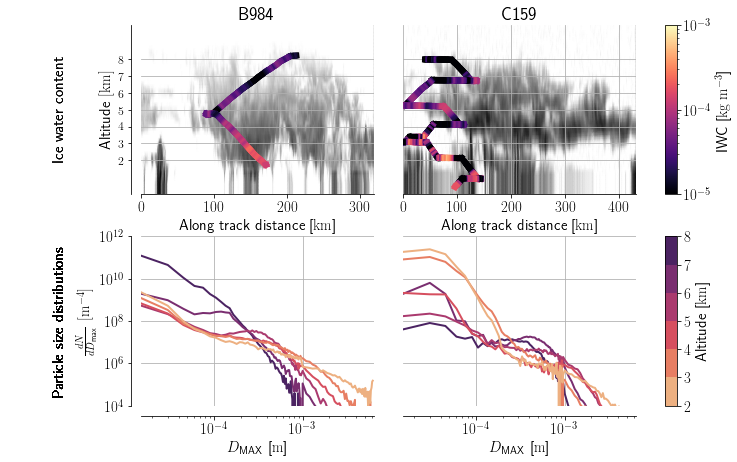

In [10]:
from matplotlib.gridspec import GridSpec
from joint_flight import plot_observations_ismar
from joint_flight.data.b984 import RADAR as radar_b984
from joint_flight.data.c159 import RADAR as radar_c159
from joint_flight.data.b984 import NEVZOROV as nevzorov_b984
from joint_flight.data.c159 import NEVZOROV as nevzorov_c159
from joint_flight.data.b984 import PSD as psd_b984
from joint_flight.data.c159 import PSD as psd_c159
from joint_flight import plot_psds

psd_b984 = psd_b984.resample(time="10s").mean()
psd_c159 = psd_c159.resample(time="10s").mean()
nevzorov_b984 = nevzorov_b984.resample(time="10s").mean()
nevzorov_c159 = nevzorov_c159.resample(time="10s").mean()
#nevzorov_c159["d"] += 20e3

fig = plt.figure(figsize=(12, 7))
gs = GridSpec(2, 4, width_ratios=[0.9, 2.0, 2.0, 0.10], hspace=0.25)

names_axs = [plt.subplot(gs[i, 0]) for i in range(2)]
legend_axs = [plt.subplot(gs[i, -1]) for i in range(2)]
axs_b984 = [plt.subplot(gs[i, 1]) for i in range(2)]
axs_c159 = [plt.subplot(gs[i, 2], sharey=axs_b984[i]) for i in range(2)]

plot_psds(radar_b984, psd_b984, nevzorov_b984, None, axs_b984, None, names_axs)
plot_psds(radar_c159, psd_c159, nevzorov_c159, None, axs_c159, legend_axs, names_axs, False)

axs_b984[0].set_title("B984")
axs_c159[0].set_title("C159")


plt.show()

fig.savefig("../plots/in_situ_measurements.png", dpi=200)

## Particle properties

In [5]:
from typhon.geodesy import great_circle_distance

In [6]:
great_circle_distance?

In [7]:

R = 6.378e3
dists = great_circle_distance(
    ismar_b984.latitude.data,
    ismar_b984.longitude.data,
    radar_b984.latitude.data,
    radar_b984.longitude.data,
    r=R)
plt.plot(dists)

NameError: name 'radar_b984' is not defined

In [ ]:
radar_b984

In [ ]:
R = 6.378e3
dists = great_circle_distance(
    ismar_c159.latitude.data,
    ismar_c159.longitude.data,
    radar_c159.latitude.data,
    radar_c159.longitude.data,
    r=R)
plt.plot(radar_c159.d, dists)

In [ ]:
shapes = [
    "6-BulletRosette",
    "8-ColumnAggregate",
    "LargeColumnAggregate",
    "LargePlateAggregate",
    "EvansSnowAggregate"
]

In [ ]:
%env LIRAS_PATH=/home/simonpf/src/joint_flight
import joint_flight
from joint_flight.ssdb import (calculate_bulk_properties,
                               load_habit_data,
                               load_habit_meta_data,
                               list_particles)
from mcrf.liras.common import n0_a_priori
from mcrf.psds import D14Ice

particles = list_particles()
particles.remove("IconHail")
particles.remove("LiquidSphere")

n0 = 10 ** n0_a_priori(260)
psd = D14Ice()
mass = np.logspace(-5, -3, 101)
psd.mass_density = mass
psd.intercept_parameter = n0 * np.ones(mass.size)

meta_data = {p: load_habit_meta_data(p) for p in particles}
particle_data_35 = {p: load_habit_data(p, 260, 35e9) for p in particles}
bulk_properties_35 = {p: calculate_bulk_properties(particle_data_35[p], psd) for p in particles}
particle_data_94 = {p: load_habit_data(p, 260, 94e9) for p in particles}
bulk_properties_94 = {p: calculate_bulk_properties(particle_data_94[p], psd) for p in particles}
particle_data_183 = {p: load_habit_data(p, 260, 183e9) for p in particles}
bulk_properties_183 = {p: calculate_bulk_properties(particle_data_183[p], psd) for p in particles}
particle_data_325 = {p: load_habit_data(p, 260, 325e9) for p in particles}
bulk_properties_325 = {p: calculate_bulk_properties(particle_data_325[p], psd) for p in particles}

In [ ]:
from joint_flight.utils import PARTICLE_NAMES
f = plt.figure(figsize=(12, 8))
gs = GridSpec(2, 3)

#
# Mass-size relation
#

ax = f.add_subplot(gs[0, 0])
for p in particles:
    x = meta_data[p]["d_max"]
    y = meta_data[p]["mass"]
    if p not in shapes:
        ax.plot(x, y, c="grey", lw=1)
for p in shapes:
    x = meta_data[p]["d_max"]
    y = meta_data[p]["mass"]
    ax.plot(x, y)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"$D_\text{max}$ [$\si{\meter}$]")
ax.set_ylabel(r"Particle mass [$\si{\kilo \gram}$]")
ax.set_title("(a) Mass-size relation", loc="left", pad=15)
ax.set_xlim([1e-5, 1e-2])
#ax.spines["left"].set_position(("outward", 10))
#ax.spines["bottom"].set_position(("outward", 10))

#
# Backscattering coefficient (35 GHz)
#

ax = f.add_subplot(gs[0, 1])
for p in particles:
    x = bulk_properties_35[p]["mass"]
    y = bulk_properties_35[p]["backscattering_coefficient"]
    if p not in shapes:
        ax.plot(x, y, c="grey", lw=1)
for p in shapes:
    x = bulk_properties_35[p]["mass"]
    y = bulk_properties_35[p]["backscattering_coefficient"]
    ax.plot(x, y)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"IWC [$\si{\kilo \gram \per \meter \cubed}$]")
ax.set_ylabel(r"Bulk backscattering coeff. [$\si{\meter \squared \per \kilo \gram \per \steradian}$]")
ax.set_title("(b) Backscatter ($\SI{35}{\giga \hertz}$)", loc="left", pad=15)
ax.set_xlim([1e-5, 1e-3])
#ax.spines["left"].set_position(("outward", 10))
#ax.spines["bottom"].set_position(("outward", 10))

#
# Backscattering coefficient (94 GHz)
#

ax = f.add_subplot(gs[0, 2])
for p in particles:
    x = bulk_properties_94[p]["mass"]
    y = bulk_properties_94[p]["backscattering_coefficient"]
    if p not in shapes:
        ax.plot(x, y, c="grey", lw=1)
for p in shapes:
    x = bulk_properties_94[p]["mass"]
    y = bulk_properties_94[p]["backscattering_coefficient"]
    ax.plot(x, y)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"IWC [$\si{\kilo \gram \per \meter \cubed}$]")
ax.set_ylabel(r"Bulk backscattering coeff. [$\si{\meter \squared \per \kilo \gram \per \steradian}$]")
ax.set_title("(c) Backscatter ($\SI{94}{\giga \hertz}$)", loc="left", pad=15)
ax.set_xlim([1e-5, 1e-3])
#ax.spines["left"].set_position(("outward", 10))
#ax.spines["bottom"].set_position(("outward", 10))

#
# Bulk extinction
#

ax = f.add_subplot(gs[1, 0])
for p in particles:
    x = bulk_properties_325[p]["mass"]
    y = bulk_properties_325[p]["bulk_extinction_coefficient"]
    if p not in shapes:
        ax.plot(x, y, c="grey", lw=1)
for p in shapes:
    x = bulk_properties_325[p]["mass"]
    y = bulk_properties_325[p]["bulk_extinction_coefficient"]
    ax.plot(x, y)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim([1e-1, 1e1])
ax.set_xlabel("IWC [$\si{\kilo \gram \per \meter \cubed}$]")
ax.set_ylabel("Bulk extinction coeff. [$\si{\meter \squared \per \kilo \gram}$]")
ax.set_title("(d) Extinction ($\SI{325}{\giga \hertz}$)", loc="left", pad=15)
ax.set_xlim([1e-5, 1e-3])
#ax.spines["left"].set_position(("outward", 10))
#ax.spines["bottom"].set_position(("outward", 10))

#
# Single scattering albedo
#

ax = f.add_subplot(gs[1, 1])
for p in particles:
    x = bulk_properties_325[p]["mass"]
    y = bulk_properties_325[p]["single_scattering_albedo"]
    if p not in shapes:
        handles = ax.plot(x, y, c="grey", lw=1)
for p in shapes:
    x = bulk_properties_325[p]["mass"]
    y = bulk_properties_325[p]["single_scattering_albedo"]
    handles += ax.plot(x, y)
ax.set_xscale("log")
ax.set_xlabel("IWC [$\si{\kilo \gram \per \meter \cubed}$]")
ax.set_ylabel("Single scattering albedo")
ax.set_title("(e) Single scattering albedo ($\SI{325}{\giga \hertz}$)", loc="left", pad=15)
ax.set_xlim([1e-5, 1e-3])
#ax.spines["left"].set_position(("outward", 10))
#ax.spines["bottom"].set_position(("outward", 10))

ax = f.add_subplot(gs[1, -1])
ax.set_axis_off()
labels = ["ARTS SSDB standard habits"] + [PARTICLE_NAMES[s] for s in shapes]
ax.legend(handles=handles, labels=labels)

plt.tight_layout()
plt.show()
f.savefig("../plots/particle_properties.pdf")